# Power Generation Forecasting





### University of Porto - School of Engineering
### Masters in Data Science and Engineering - MECD/FEUP
### Students: Ian Karkles and Sónia Ferreira

## Approach using CRISP-DM Methodology
### Business Context - Wind forecasting for Power Generation
>In the recent years of the renewable energy revolution that the world has seen, many alternative power sources have become more and more common each day. One of the main ones to develop a leading role is the wind powered energy.
>This energy is possible to obtain through wind turbines spread across favorable areas with the most strong and constant winds possible. Mostly in hilly places and nearshore.

>However, in the day to day operation of these wind parks we still have variance in many climate and mechannical features that directy impact the possible power generation and it's output to eletrical grid.
>In this scenario many outcomes are impacted and welcome a previously forecast power generation output, which of these, the main ones are: The preventive maintenance schedule are of the turbines directly impacted for the power output, the planning of the other resources of the grid that are controlled with manpower (Natural gas, Biomass, Coal, Hidroeletrical, Nuclear and etc.) and more, the necessity to do ajustments in the grid in times of scarcity.
>Due to these aspects, a detailed and trustworthy forecast of the power output generated by a wind turbine is fundamental process in this industry.

### Data Context - What is the available data and how it's distributed

>In the context of forecasting time relate processes, the approach for time series is one of the most common with a large and extensive bibliography available about it.
For this specific problem, we gathered a available dataset on Kaggle, through the following link: https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting

>The present dataset contains output of energy and many features in the minutes intervals of a two years period for a specific wind generator, which was agreed by the team that would be a good dataset for the job, even because have a 9.1 grade in Kaggle in the Usability concept.

The Dataset have the following columns to explore:


Columns  | Meaning
-------------------|------------------
Timestamp      | The Actual time of the measurement in 10 mins intervals
ActivePower       | The power generated by the turbine in Megawatts/Hour (MwH)
AmbientTemperature      | The temperature of the climate outside of the turbine 
BearingShaftTemperature       | The Shaft temperature of the turbine bearing at the time of the measurement
Blade1PitchAngle       | the Angle of the 1º Blade of the Wind Turbine
Blade2PitchAngle       | the Angle of the 2º Blade of the Wind Turbine
Blade3PitchAngle       | the Angle of the 3º Blade of the Wind Turbine
ControlBoxTemperature       | The Control Box temperature (ºC) of the turbine bearing at the time of the measurement 
GearboxBearingTemperature       | The Gearbox Bearing temperature (ºC) of the turbine bearing at the time of the measurement
GearBoxTemperature       | The Gearbox hub temperature (ºC) of the turbine bearing at the time of the measurement 
Generator RPM       | The generator axis rotations per minute at the time of measurement
GeneratorWinding1Temperature       | 1º Alternator side of the wind turbine temperature (ºC) of the time of the measurement 
GeneratorWindiing2Temperature       | 2º Alternator side of the wind turbine temperature (ºC) of the time of the measurement  
HubTemperature       | The Hub axis temperature(ºC) in the time of the measurement
MainBoxTemperature       |The Main Box of the wind turbine temperature in the time of measurement 
NacellePosition       | The body position of the wind turbine relation with the Wind 
ReactivePower       | The Power generated by the reactor inside of the wind turbine 
RotorRPM       | The Wind Turbine rotations per minute at the time of measurement
TurbineStatus       | The Turbine status 
WTG       | the code that reference the turbine (static through the dataset)
WindDirection       | the wind direction in degrees 
WindSpeed       | the wind speed in Km/h  

------------
In the Below image, it's possible to understand a little more about the wind turbine parts features on the Dataset.

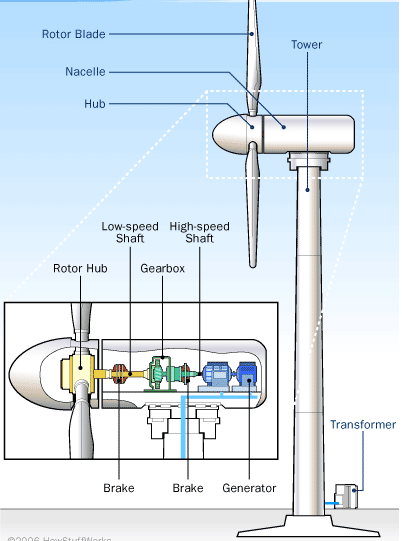



#Power Generation Forecasting - Source Code

## Library & Data Import

In [1]:
import pandas       as pd
import numpy        as np
import missingno    as msno
import warnings
import seaborn      as sns
import matplotlib.pyplot    as plt

from sklearn.model_selection      import train_test_split
from sklearn                      import model_selection
from sklearn.preprocessing        import MinMaxScaler
from sklearn.linear_model         import LinearRegression
from sklearn.decomposition        import PCA
from sklearn.feature_selection    import SelectKBest
from sklearn.feature_selection    import f_regression
from sklearn.metrics              import mean_squared_error
from sklearn.metrics              import r2_score

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


## https://www.kaggle.com/code/whatevernevermind/linear-regression-with-97-accuracy-eda - Notebook of this Dataset

In [2]:
url_turbine_data = "https://drive.google.com/uc?export=download&id=1e_k7muHOPSrprMMZyzv96M7lTk-m80eW"
df_orig = pd.read_csv(url_turbine_data, parse_dates = True)
df_test = pd.read_csv(url_turbine_data, parse_dates = True, index_col = 0, header = 0) #new copy to use on the test sets

In [3]:
df_orig.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


##**Exploratory Data Analysis** <br>
#### This section seeks to answer the questions listed in the business context section. The data will be analized and vizualized for easy understanding and followed with appropriated statistical analysis for empirical findings within the data. <br>
The following questions will be answered in this section:
*   In which months do we have more wind power?
*   Does the condition of ... ?

<br>

#!!!!! list the questions from the business context section.




###**Data Quality**

####Dataset info

In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [5]:
df_orig.rename(columns = {'Unnamed: 0':'Timestamp'}, inplace = True) #rename the 1st column
df_orig['Timestamp'] = pd.to_datetime(df_orig['Timestamp'], yearfirst = True,) # convert type

In [6]:
print(f' This dataset has records from: {df_orig.Timestamp.min()} to {df_orig.Timestamp.max()}' )

 This dataset has records from: 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00


In [7]:
shape = df_orig.shape #total nr of rows and colums
print(f"Dataframe shape: {shape}")

Dataframe shape: (118224, 22)


Dataset comprises of 118224 observations and 22 characteristicts. <br>
Out of which one is a dependent variable and the remain are independent:
*   Dependendent variable: ActievPower;
*   Independent variable: remain characteristicts.



In [8]:
df_orig.info() #colums and corresponding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Timestamp                     118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

Dataset has only float and object variables. <br>
Object variable for column WGT will need to be encoded, if this field is to be used in the forecasting.

#### Null values / Missing Values

In [9]:
df_orig.isna().sum()

Timestamp                           0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

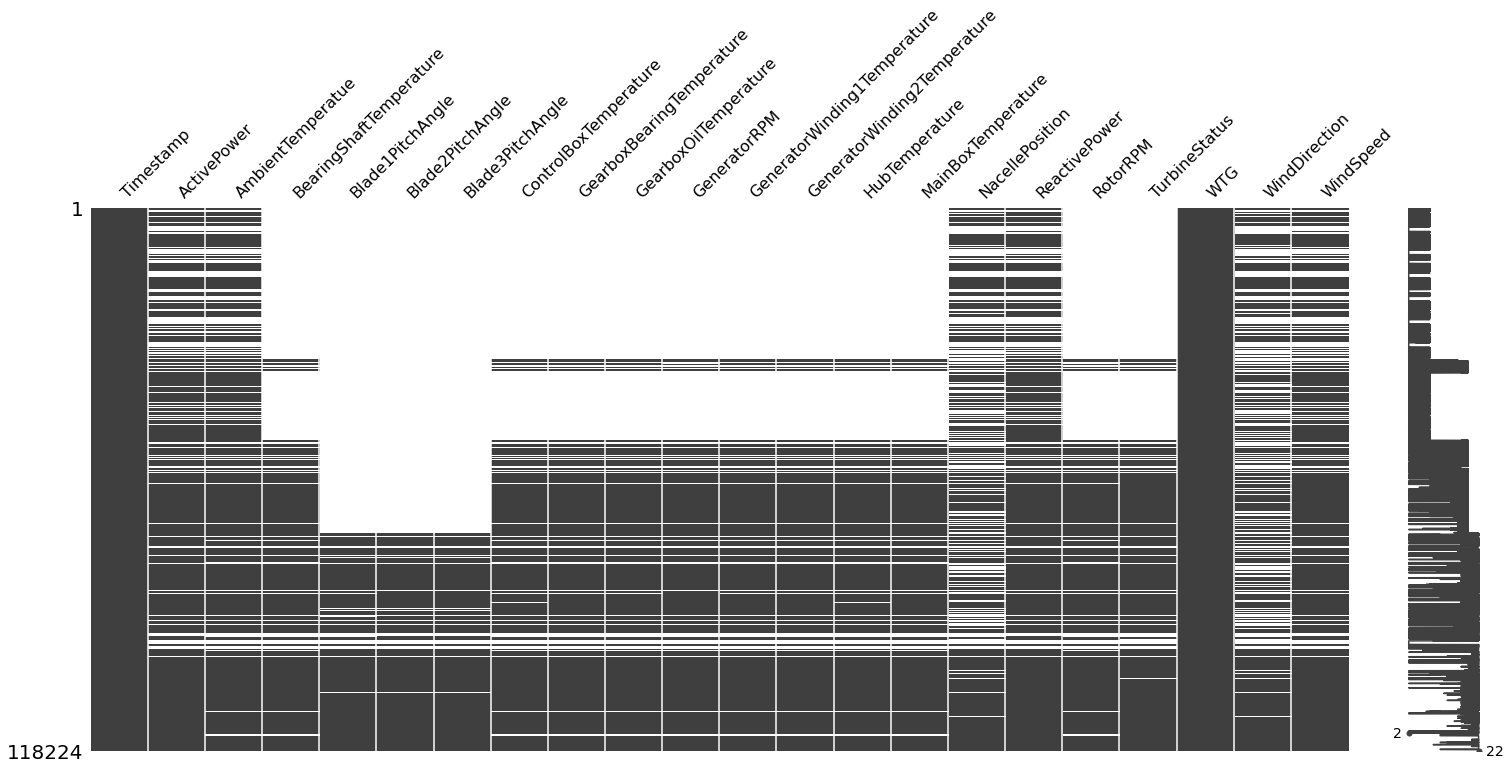

In [10]:
msno.matrix(df_orig)

In [11]:
#Use df_test (because has no header) to have an overwiew on the number of null values per year
for yr in df_test.index.year.unique():
    print('\nYear',yr,'\n', df_test[df_test.index.year==yr].isna().sum())


Year 2017 
 ActivePower                     144
AmbientTemperatue               144
BearingShaftTemperature         144
Blade1PitchAngle                144
Blade2PitchAngle                144
Blade3PitchAngle                144
ControlBoxTemperature           144
GearboxBearingTemperature       144
GearboxOilTemperature           144
GeneratorRPM                    144
GeneratorWinding1Temperature    144
GeneratorWinding2Temperature    144
HubTemperature                  144
MainBoxTemperature              144
NacellePosition                 144
ReactivePower                   144
RotorRPM                        144
TurbineStatus                   144
WTG                               0
WindDirection                   144
WindSpeed                       144
dtype: int64

Year 2018 
 ActivePower                     17161
AmbientTemperatue               17157
BearingShaftTemperature         48509
Blade1PitchAngle                52560
Blade2PitchAngle                52560
Blade3PitchAngl

As it's vissible, the data has null values and will requires either data cleaning or the values to be filled by a technique.

####Redundant data


In [12]:
df_orig[df_orig.Timestamp.duplicated()] # check for duplicate values

,Timestamp,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed


No duplicates values were found in the dataframe!

####4.1.3 Inconsistent Data (para ver se é necessário)


####4.1.4 Noisy Data  (para ver se é necessário)


####4.1.5 Outliers  (para ver se é necessário)

#### Key insignts at dependent variable - ActivePower


In [13]:
df_orig.ActivePower.unique()

array([        nan, -5.3577271 , -5.82236038, ..., 20.77778972,
       62.09103858, 68.66442478])

Dependent variable ActivePower is a continuos variable 

In [14]:
df_orig.ActivePower.value_counts()

 0.000000       594
 1730.664400     44
-0.000302         8
 1575.574200      5
 1737.228100      3
               ... 
 24.628053        1
 97.702130        1
 82.715674        1
 189.399978       1
 68.664425        1
Name: ActivePower, Length: 94084, dtype: int64

Allows to see by descending order, the most frequent ActivePower generation values in the dataset; <br>
It seems that the most concentration of ActivePower included positive and negative values.


In [15]:
cols = ['ActivePower','WindSpeed']
df_orig[cols][df_orig['ActivePower']<0]

,ActivePower,WindSpeed
144,-5.357727,2.279088
145,-5.822360,2.339343
146,-5.279409,2.455610
147,-4.648054,2.026754
148,-4.684632,1.831420
...,...,...
118103,-7.005695,2.505505
118104,-5.576951,2.174616
118105,-4.945515,2.333189
118106,-6.565684,2.946595


In [16]:
cols = ['ActivePower','WindSpeed']
df_orig[cols][df_orig['ActivePower']==0]

,ActivePower,WindSpeed
5357,0.0,1.946512
5358,0.0,2.298387
5359,0.0,2.272900
5361,0.0,2.590335
5362,0.0,2.832323
...,...,...
102299,0.0,4.483921
102301,0.0,3.593173
104577,0.0,3.110550
104578,0.0,3.150879


---> negative power generation ?? weird

these all seem to happen at low wind speed, however, there are occasions with similar windspeeds and the ActivePower is 0 so it is likely they are a incorrect readings and so they will be dropped¶

--- we should either drop this values or put them to 0... TO CHECK!!!

####Statistics of the dataset


In [17]:
df_orig.describe() #summary stats

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


Column Analysis:

*   The dataset contains values from 
*   
*   







####Data Correlations

In [18]:
df_orig.columns

Index(['Timestamp', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

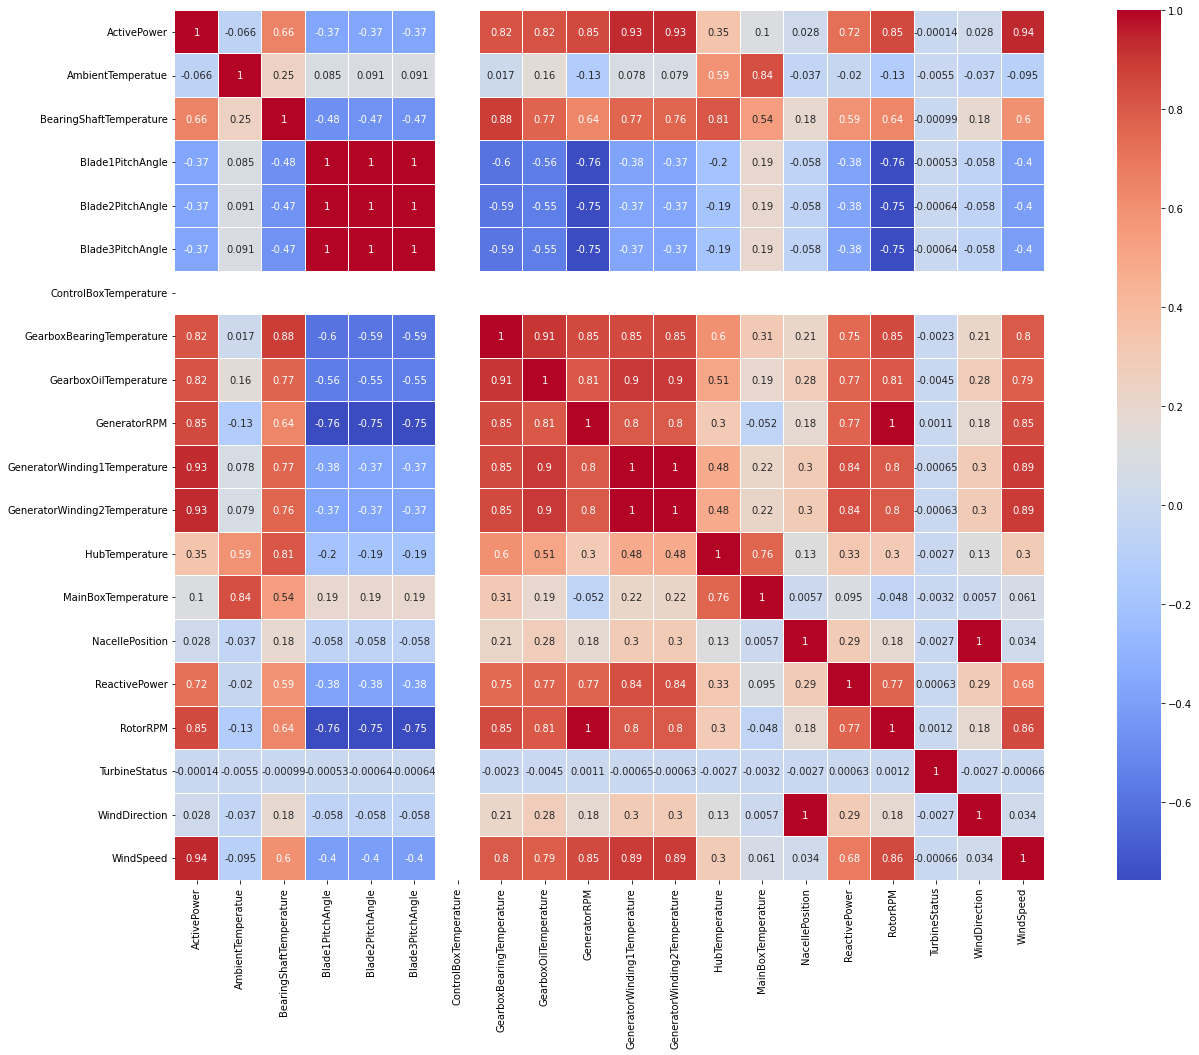

In [19]:
plt.subplots(figsize=(26, 16))
sns.heatmap(df_orig.corr(),  square=True,  annot=True,linewidths=0.1, cmap="coolwarm")
plt.show()

####Data Vizualization

**Active Power Output by Month/Year:**

Text(0.5, 0, 'by Month/Year')

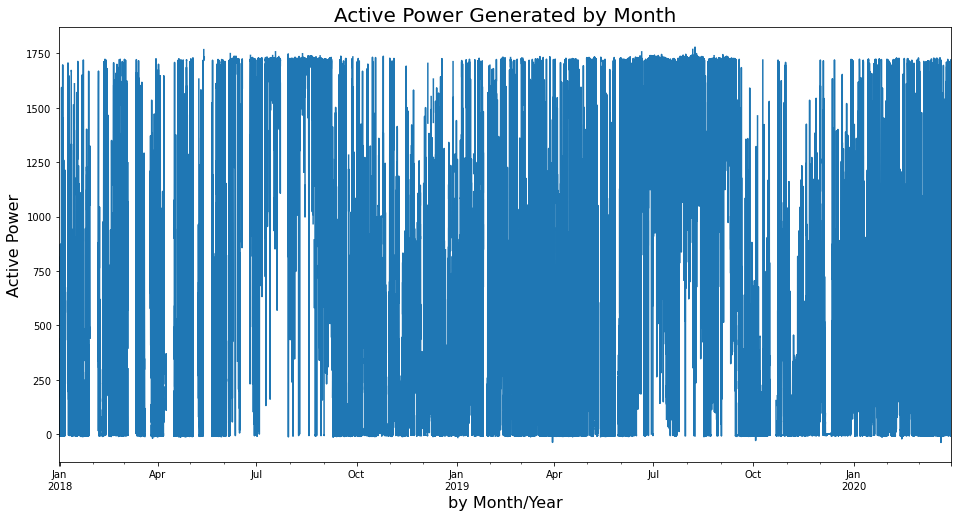

In [20]:
plt.subplots(figsize=(16, 8))
df_test['ActivePower'].plot()
plt.title('Active Power Generated by Month', fontsize=20)
plt.ylabel('Active Power', fontsize=16)
plt.xlabel('by Month/Year', fontsize=16)

Because there are readings every 10 minutes, is very difficult to read the plot when using all the data to visualize our dataset. 
Therefore, next step is to do a sampling of the mean daily values to view the data more clearly.

**Mean Daily Active Power Generated by Month/Year:**

Text(0.5, 0, 'by Month/Year')

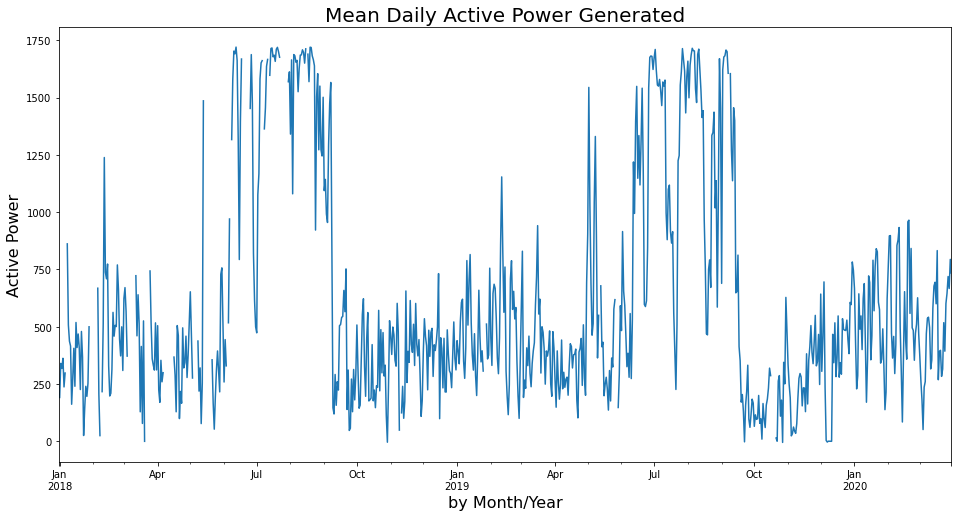

In [21]:
# resampling daily - Active Power
plt.subplots(figsize=(16, 8))
df_test['ActivePower'].resample('D').mean().plot()
plt.title('Mean Daily Active Power Generated', fontsize=20)
plt.ylabel('Active Power', fontsize=16)
plt.xlabel('by Month/Year', fontsize=16)

**Mean Daily Wind Speed Generated by Month/Year:**

Since the turbine is moved by the wind it seems logical that it should generate more power in windy conditions. The below plot presents the mean daily for the wind speed, this should allow analyzing if there is a similarity in the pattern of the power production.

Text(0.5, 0, 'by Month/Year')

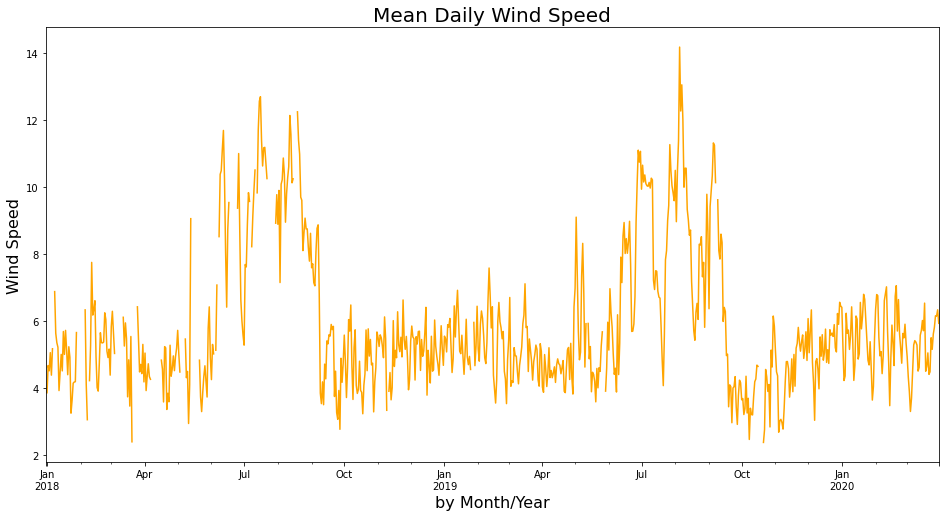

In [22]:
# resampling daily - WindSpeed
plt.subplots(figsize=(16, 8))
df_test['WindSpeed'].resample('D').mean().plot(color='orange')
plt.title('Mean Daily Wind Speed', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16)
plt.xlabel('by Month/Year', fontsize=16)

**Overlapping Mean for Active Power and Wind Speed:**

Since the scale of both graphs is not equal, wind speed was multipled by 100 to ajust and allow to get the same scale, pattern and therefore a better observation of the correlation of this two attributes.

Daily and monthly resampling values are graphed belowe and the correlation between the two attributes is evident, when there is more wind speed there is more production of power

Text(0.5, 0, 'by Month/Year')

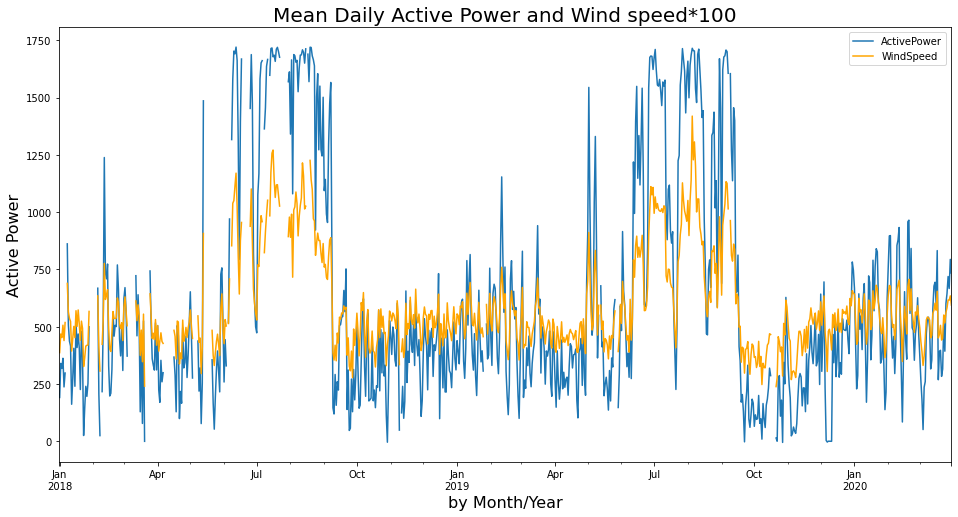

In [23]:
plt.subplots(figsize=(16, 8))
df_test['ActivePower'].resample('D').mean().plot(legend=True)
(df_test['WindSpeed']*100).resample('D').mean().plot(legend=True, color='orange')
plt.title('Mean Daily Active Power and Wind speed*100', fontsize=20)
plt.ylabel('Active Power', fontsize=16)
plt.xlabel('by Month/Year', fontsize=16)

Text(0.5, 0, 'by Month/Year')

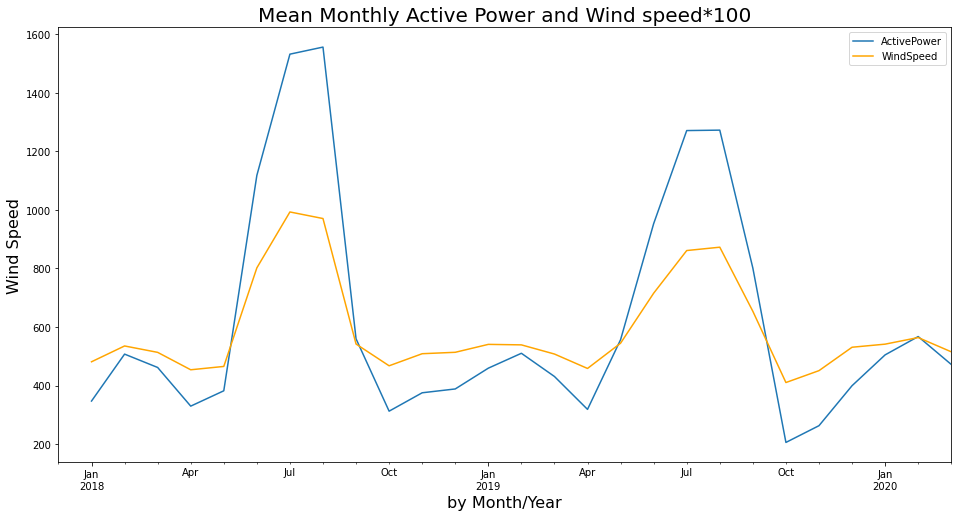

In [24]:
plt.subplots(figsize=(16, 8))
df_test['ActivePower'].resample('M').mean().plot(legend=True)
(df_test['WindSpeed']*100).resample('M').mean().plot(legend=True, color='orange')
plt.title('Mean Monthly Active Power and Wind speed*100', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16)
plt.xlabel('by Month/Year', fontsize=16)

**Main conclusions of Data Vizualization:**


*   Active Power vs Wind Power ...
*   Null values are vissible on the daily mean graphs ....



###**Data Preprocessing**

As from this step DF_TEST will be manipulated for further modeling

####Drop Columns

- WTG is a static code (G01) through the dataset, not relevant for this study and therefore the column can be dropped.


In [25]:
df_test.drop(columns=['WTG'], inplace = True)

####Handling NaN value

In [26]:
df_median = df_test.copy()

df_mean = df_test.copy()

df_mode = df_test.copy()

df_nofill = df_test.copy()

In [27]:
df_median.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
columns = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,'Blade3PitchAngle', 'ControlBoxTemperature', 'GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection','WindSpeed']

for n in columns:
    df_median[n].fillna(df_median[n].median(),inplace = True)
    df_mean[n].fillna(df_mean[n].mean(),inplace = True)
    df_mode[n].fillna(df_mode[n].mode(),inplace = True)  #value that appears the most in a set of values  

In [29]:
df_median.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
2017-12-31 00:10:00+00:00,NaN,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
2017-12-31 00:20:00+00:00,NaN,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
2017-12-31 00:30:00+00:00,NaN,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765
2017-12-31 00:40:00+00:00,NaN,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765


In [30]:
for yr in df_test.index.year.unique():
    print('\nYear',yr,'\n', df_test[df_test.index.year==yr].isna().sum())


Year 2017 
 ActivePower                     144
AmbientTemperatue               144
BearingShaftTemperature         144
Blade1PitchAngle                144
Blade2PitchAngle                144
Blade3PitchAngle                144
ControlBoxTemperature           144
GearboxBearingTemperature       144
GearboxOilTemperature           144
GeneratorRPM                    144
GeneratorWinding1Temperature    144
GeneratorWinding2Temperature    144
HubTemperature                  144
MainBoxTemperature              144
NacellePosition                 144
ReactivePower                   144
RotorRPM                        144
TurbineStatus                   144
WindDirection                   144
WindSpeed                       144
dtype: int64

Year 2018 
 ActivePower                     17161
AmbientTemperatue               17157
BearingShaftTemperature         48509
Blade1PitchAngle                52560
Blade2PitchAngle                52560
Blade3PitchAngle                52560
ControlBoxTem

In [31]:
df_median.isna().sum()

ActivePower                     23474
AmbientTemperatue                   0
BearingShaftTemperature             0
Blade1PitchAngle                    0
Blade2PitchAngle                    0
Blade3PitchAngle                    0
ControlBoxTemperature               0
GearboxBearingTemperature           0
GearboxOilTemperature               0
GeneratorRPM                        0
GeneratorWinding1Temperature        0
GeneratorWinding2Temperature        0
HubTemperature                      0
MainBoxTemperature                  0
NacellePosition                     0
ReactivePower                       0
RotorRPM                            0
TurbineStatus                       0
WindDirection                       0
WindSpeed                           0
dtype: int64

In [32]:
df_mean.isna().sum()

ActivePower                     23474
AmbientTemperatue                   0
BearingShaftTemperature             0
Blade1PitchAngle                    0
Blade2PitchAngle                    0
Blade3PitchAngle                    0
ControlBoxTemperature               0
GearboxBearingTemperature           0
GearboxOilTemperature               0
GeneratorRPM                        0
GeneratorWinding1Temperature        0
GeneratorWinding2Temperature        0
HubTemperature                      0
MainBoxTemperature                  0
NacellePosition                     0
ReactivePower                       0
RotorRPM                            0
TurbineStatus                       0
WindDirection                       0
WindSpeed                           0
dtype: int64

In [33]:
df_mode.isna().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

### 

In [34]:
df_median.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.0,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,619.109805,28.685033,42.963394,3.717605,4.130284,4.130284,0.0,64.517005,57.388925,1112.828712,69.311673,68.608353,36.947947,39.521073,190.736734,77.758507,9.998225,1.214372e+03,190.736734,5.814764
std,611.275373,3.896064,4.032802,13.093631,12.834936,12.834936,0.0,7.610422,4.599345,383.486996,16.776437,16.810500,3.762904,4.168552,69.389261,106.441060,3.421776,2.615875e+05,69.389261,2.346292
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,26.350811,42.512424,0.394399,0.888977,0.888977,0.0,64.181922,56.876925,1095.351163,64.597785,63.796541,36.996185,39.157395,172.000000,-0.068410,9.850361,2.000000e+00,172.000000,4.285497
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,30.714347,43.291577,0.394399,0.888977,0.888977,0.0,65.446392,57.500770,1155.511885,67.010176,66.257863,37.312651,39.832760,195.500000,108.893640,10.362055,2.000000e+00,195.500000,6.930121
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [35]:
df_mean.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.0,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,3.892099,4.032497,12.304361,12.066127,12.066127,0.0,7.604517,4.595732,383.317492,16.442511,16.461954,3.762534,4.168457,69.038735,104.380193,3.420444,2.615850e+05,69.038735,2.342773
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,26.350811,42.512424,5.487225,5.989932,5.989932,0.0,64.181922,56.876925,1095.351163,64.597785,63.796541,36.897978,39.157395,172.000000,-0.068410,9.850361,2.000000e+00,172.000000,4.285497
50%,402.654893,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,79.243265,9.907500,3.150000e+01,196.290539,5.878960
75%,1074.591780,30.714347,43.291577,9.749641,10.036535,10.036535,0.0,65.446392,57.561217,1155.511885,72.460403,71.826659,37.312651,39.832760,196.290539,108.893640,10.362055,2.280429e+03,196.290539,6.930121
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [36]:
df_mode.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


after filling df_median and mean_df it's visible that the column ControlBoxTemperature is always 0 and therefore can be dropped 

In [37]:
df_median.drop(columns=['ControlBoxTemperature'], inplace = True)
df_mean.drop(columns=['ControlBoxTemperature'], inplace = True)
df_mode.drop(columns=['ControlBoxTemperature'], inplace = True)
df_nofill.drop(columns=['ControlBoxTemperature'], inplace = True)

In [38]:
df_all = [df_median,df_mean, df_nofill]

for df in df_all:
    df.dropna(axis=0,how = 'any',inplace = True)
    print(df.isnull().sum())

ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
dtype: int64
ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
G

As it's visible no more null values exist in any of the datasets that will be used further.

In [39]:
df_nofill.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,58.852308,56.782879,68.210284,62.792258,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,44.80,2.212693
2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,48.911180,56.033333,68.229411,61.747975,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,49.00,2.130019
2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,56.859428,55.873937,85.012009,60.785716,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,61.50,2.347810
2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,56.761226,55.807661,63.945036,60.277575,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,93.25,2.161460
2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,56.483241,55.451512,21.339981,60.004809,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,138.50,1.913490


In [40]:
#pd.unique(list(df_median.index.year))
print(f' This dataset has records in the following year(s):', pd.unique(list(df_median.index.year)) )

 This dataset has records in the following year(s): [2018 2019 2020]


In [41]:
df_median['Year'] = df_median.index.year
df_median['Month'] = df_median.index.month
df_median['Day'] = df_median.index.day
df_median

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Year,Month,Day
2018-01-01 00:00:00+00:00,-5.357727,23.148729,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,...,39.491310,8.000000,-9.960830,10.098702,2.0,8.000000,2.279088,2018,1,1
2018-01-01 00:10:00+00:00,-5.822360,23.039754,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,...,39.491310,300.428571,-9.628441,10.098702,2.0,300.428571,2.339343,2018,1,1
2018-01-01 00:20:00+00:00,-5.279409,22.948703,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,...,39.491310,340.000000,-9.491235,10.098702,2.0,340.000000,2.455610,2018,1,1
2018-01-01 00:30:00+00:00,-4.648054,22.966851,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,...,39.491310,345.000000,-9.856136,10.098702,2.0,345.000000,2.026754,2018,1,1
2018-01-01 00:40:00+00:00,-4.684632,22.936520,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.860720,65.788800,...,39.491310,345.000000,-9.745593,10.098702,2.0,345.000000,1.831420,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,...,36.476562,178.000000,13.775785,9.234004,2.0,178.000000,3.533445,2020,3,30
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,...,36.328125,178.000000,8.088928,9.229370,2.0,178.000000,3.261231,2020,3,30
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,...,36.131944,178.000000,4.355978,9.236802,2.0,178.000000,3.331839,2020,3,30
2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,...,36.007805,190.000000,12.018077,9.237374,2.0,190.000000,3.284468,2020,3,30


Correlation will show how the the variables are related to each other

## Building a model

###Test 1 - LinearRegression

In [42]:
df_nofill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32818 entries, 2019-05-06 14:10:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   32818 non-null  float64
 1   AmbientTemperatue             32818 non-null  float64
 2   BearingShaftTemperature       32818 non-null  float64
 3   Blade1PitchAngle              32818 non-null  float64
 4   Blade2PitchAngle              32818 non-null  float64
 5   Blade3PitchAngle              32818 non-null  float64
 6   GearboxBearingTemperature     32818 non-null  float64
 7   GearboxOilTemperature         32818 non-null  float64
 8   GeneratorRPM                  32818 non-null  float64
 9   GeneratorWinding1Temperature  32818 non-null  float64
 10  GeneratorWinding2Temperature  32818 non-null  float64
 11  HubTemperature                32818 non-null  float64
 12  MainBoxTemper

In [43]:
columns = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection', 'WindSpeed']
target = ['ActivePower']

In [44]:
x_median = df_nofill[columns]
y_median = df_nofill[target]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_median,y_median,test_size=0.3, random_state=1)
#train_test_split --> Split arrays or matrices into random train and test subsets.


#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size =0.3, train_size = .6, random_state = 0 )

In [46]:
x_train

,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
2019-06-17 01:40:00+00:00,27.873693,44.340168,0.593200,1.148325,1.148325,68.947325,65.608987,1687.216889,109.554383,109.006105,37.336724,36.674173,342.0,315.911110,15.143985,2.0,342.0,8.686966
2020-03-16 16:20:00+00:00,28.815073,50.871836,1.308152,1.968543,1.968543,74.644536,63.379204,1733.717210,104.954821,104.470742,41.090666,42.878803,163.0,340.556562,15.544143,2.0,163.0,8.281844
2019-10-15 08:10:00+00:00,31.039011,41.926413,1.316142,1.680659,1.680659,64.976273,59.574403,1027.214924,61.674597,60.840119,36.986386,42.232374,114.0,13.646289,9.218020,2.0,114.0,3.175825
2019-06-03 22:10:00+00:00,28.666578,49.401098,-1.006267,-0.477999,-0.477999,77.814454,65.823961,1633.678000,105.375569,104.916109,39.996185,41.981250,357.0,275.804372,14.648626,2.0,357.0,8.258249
2019-10-31 10:50:00+00:00,27.506513,40.980490,-1.052957,-0.564647,-0.564647,66.442508,57.148383,1400.296244,66.284904,65.625768,32.176777,37.812515,169.0,180.382146,12.551566,2.0,169.0,6.935094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 04:50:00+00:00,25.210710,40.261540,-0.854714,-0.385515,-0.385515,65.827120,57.449063,1150.706910,61.147472,60.434146,30.693355,35.985337,163.0,100.071422,10.320113,2.0,163.0,5.697400
2019-08-08 15:00:00+00:00,27.837020,47.354471,8.436747,9.034829,9.034829,80.124201,67.981726,1754.694250,119.051976,118.407172,42.012848,41.250912,332.0,348.871190,15.730535,2.0,332.0,11.290979
2020-03-28 20:50:00+00:00,29.018737,47.986981,-1.036846,-0.567470,-0.567470,66.427735,58.252473,1165.773956,71.715400,70.796211,41.003815,40.062390,186.5,96.518956,10.448285,2.0,186.5,6.138852
2019-07-07 17:40:00+00:00,30.258040,51.691893,-0.587267,-0.255638,-0.255638,77.253109,65.675206,1597.342480,108.018175,107.414657,44.003815,43.675352,335.0,262.072255,14.337323,2.0,335.0,7.552825


Normalizing the dataset, in order that the difference doesn't affect the model

In [47]:
norm = MinMaxScaler().fit(x_train)

xtrain_norm = norm.transform(x_train)
xtest_norm = norm.transform(x_test)

In [48]:
xtrain_norm = pd.DataFrame(xtrain_norm)
xtest_norm = pd.DataFrame(xtest_norm)

In [49]:
def LinearRegressionModel(xtrain,xtest,ytrain,ytest):
    
    pca = PCA()

    pca.fit(xtrain)
    pca_train = pca.transform(xtrain)
    pca_test = pca.transform(xtest)

    X_new = SelectKBest(f_regression, k=10).fit_transform(xtrain,ytrain)
    X_new_test = SelectKBest(f_regression, k=10).fit_transform(xtest,ytest) 
    
    clf = LinearRegression()
    clf.fit(pca_train, y_train)
    
    print("LinearRegression")
    pred = clf.predict(pca_test)
    pred_train = clf.predict(pca_train)
    
    print("\n")
    print("Test Evaluation: ")
    print(np.sqrt(mean_squared_error(ytest,pred)))
    print(r2_score(y_test,pred))

    print("\n")
    print("Train Evaluation:")
    print(np.sqrt(mean_squared_error(ytrain,pred_train)))
    print(r2_score(y_train,pred_train))
    
    return 

In [50]:
LinearRegressionModel(xtrain_norm,xtest_norm,y_train,y_test)

LinearRegression


Test Evaluation: 
94.69642046367261
0.9751543726333008


Train Evaluation:
95.46311559209903
0.9746080848583387


### Test 2 - SARIMA 


As previously observed in "EDA - Data Vizualization", the data shows aseasonal components therefore the simple ARIMA (Autoregressive Integrated Moving Average) model can't be used but SARIMA an extension to ARIMA that supports the direct modeling of the seasonal component can.

**Trend Elements**<br>
p: Trend autoregression order. <br>
d: Trend difference order. <br>
q: Trend moving average order. <br>

**Seasonal Elements** <br>
P: Seasonal autoregressive order. <br>
D: Seasonal difference order. <br>
Q: Seasonal moving average order. <br>
m: The number of time steps for a single seasonal period. <br>

In [51]:
# Testing For Stationarity - Dicker-Fuller test

from statsmodels.tsa.stattools import adfuller

def adfuller_test(activePower):
    result = adfuller(activePower)
    labels = ['ADF: ','p-value: ','Nr of Lags :','Number of Observations Used  for ADF Regression and Critical Values Calculation :']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(df.ActivePower)

ADF:  : -16.287966204107562
p-value:  : 3.360609577781106e-29
Nr of Lags : : 13
Number of Observations Used  for ADF Regression and Critical Values Calculation : : 32804
Strong evidence against the null hypothesis(Ho), Reject the null hypothesis. Data has no unit root and is stationary


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm


In [3]:



model=pm.auto_arima(df_test['ActivePower'],start_p=0,d=0,start_q=0,
          max_p=15,max_q=5, 
          start_P=0,D=0, start_Q=0, 
          max_P=8, max_Q=8, 
          m=12, seasonal=True, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=100)

NameError: ignored

###Test 3 - LSTM

In [ ]:
# To Do - Ian
# Comparar mais modelos
# Método SKLearn para 